In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

3


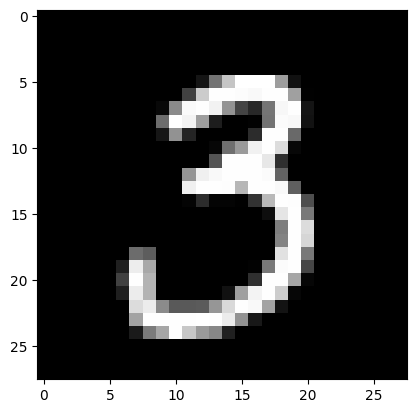

In [8]:
plt.imshow(X_test[90], cmap = "gray")
print(y_test[90])

In [9]:
X = X_test.reshape(-1, 28*28)
Y = y_test

In [11]:
X.shape

(10000, 784)

### 1. Preprocessing

In [13]:
sc = StandardScaler() 

In [14]:
X_ = sc.fit_transform(X) # Standarization

In [15]:
X_.shape

(10000, 784)

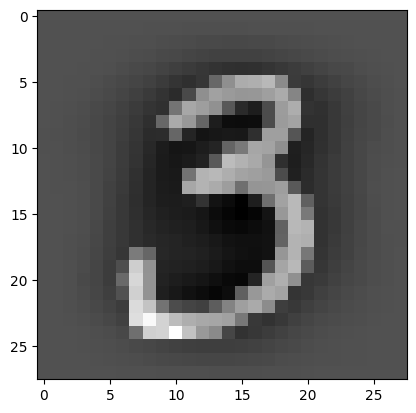

In [16]:
plt.imshow(X_[90].reshape(28, 28), cmap = "gray")

### Sklearn PCA

In [19]:
pca = PCA(n_components = 2)

In [20]:
Z_pca = pca.fit_transform(X_)

In [22]:
Z_pca.shape

(10000, 2)

In [24]:
Z_pca

array([[-5.45827142,  6.41456403],
       [ 2.80474079, -8.02803841],
       [-7.4112865 , -3.86400095],
       ...,
       [-5.00437974,  1.15364708],
       [-1.42085186, -4.42326334],
       [13.14268144, -4.2622853 ]])

In [25]:
pca.explained_variance_

array([41.39893397, 28.35105801])

### Custom PCA

In [26]:
import numpy as np

### 2. Compute Covariance Matrix

In [27]:
covar = np.dot(X_.T, X_)

In [28]:
covar.shape

(784, 784)

### 3. Compute eigen vectors using SVD

In [29]:
from numpy.linalg import svd

In [30]:
U, S, V = svd(covar)

In [31]:
U.shape

(784, 784)

In [32]:
Ured = U[:, :2]
Ured.shape

(784, 2)

### 4. Projection

In [33]:
Z = np.dot(X_, Ured)

In [35]:
Z.shape

(10000, 2)

In [36]:
Z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

### Visualize Dataset

In [37]:
import pandas as pd

In [41]:
new_dataset = np.hstack((Z, Y.reshape(-1, 1)))

In [42]:
dataframe = pd.DataFrame(new_dataset, columns=["PC1", "PC2", "label"])

In [43]:
dataframe.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


In [44]:
import seaborn as sns

<Figure size 1500x1500 with 0 Axes>

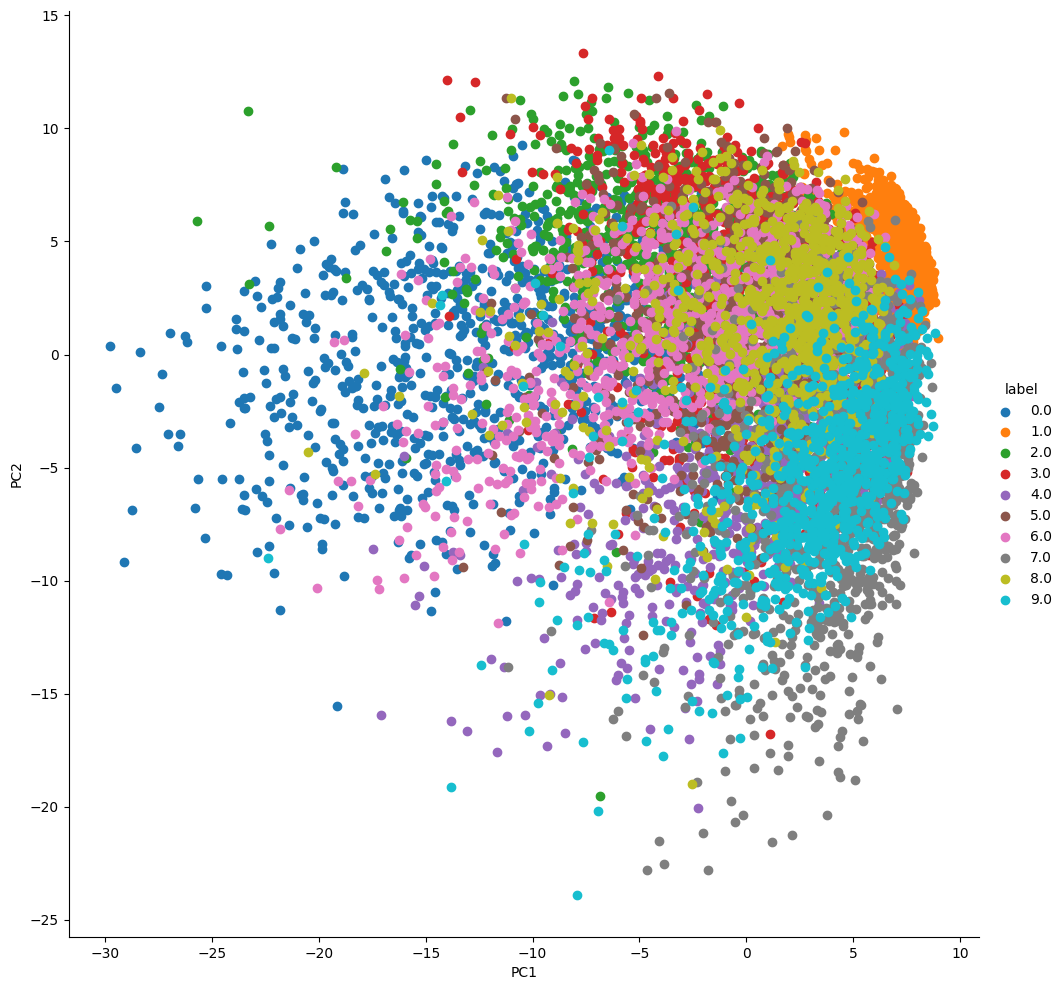

In [45]:
plt.figure(figsize=(15, 15))
fg = sns.FacetGrid(dataframe, hue = "label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

### PCA with 784

In [46]:
pca = PCA()

In [47]:
Z_pca = pca.fit_transform(X_)

In [49]:
Z_pca.shape

(10000, 784)

In [52]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

In [53]:
cum_var

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

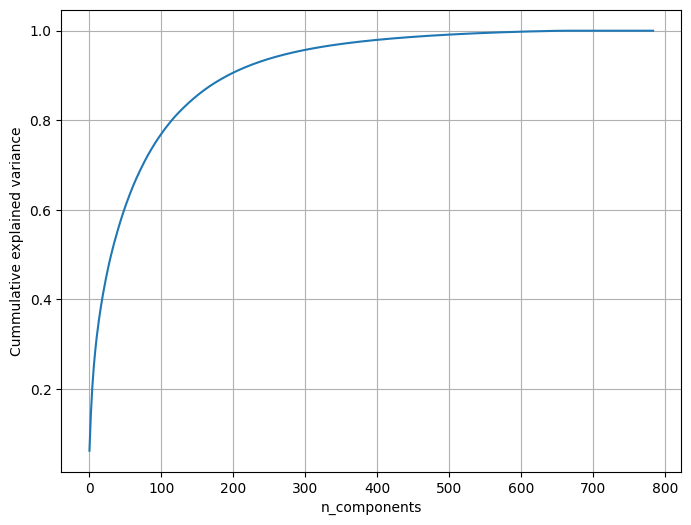

In [54]:
plt.figure(figsize= (8, 6))
plt.plot(cum_var)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()